In [20]:
import sys

sys.path.append('../src/')
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

from helpers.data_utils import UnlearningDataLoader


def entropy(p, dim=-1, keepdim=False):
    return -torch.where(p > 0, p * p.log(), p.new([0.0])).sum(dim=dim, keepdim=keepdim)


def collect_prob(data_loader, model):
    data_loader = torch.utils.data.DataLoader(
        data_loader.dataset,
        batch_size=1,
        shuffle=False,
        num_workers=4,
        prefetch_factor=10,
    )
    prob = []
    with torch.no_grad():
        for batch in tqdm(data_loader):
            batch = [tensor.to(next(model.parameters()).device) for tensor in batch]
            # data, _, target = batch
            data, _ = batch
            output = model(data)
            prob.append(F.softmax(output, dim=-1).data)
    return torch.cat(prob)

UDL = UnlearningDataLoader(
    "cifar-10",128, 32, 3407, is_vit=False, is_class_unlearning=False, class_to_forget=None,
)
dl, _ = UDL.load_data()
num_classes = len(UDL.classes)
input_channels = UDL.input_channels

  0%|          | 0/45000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

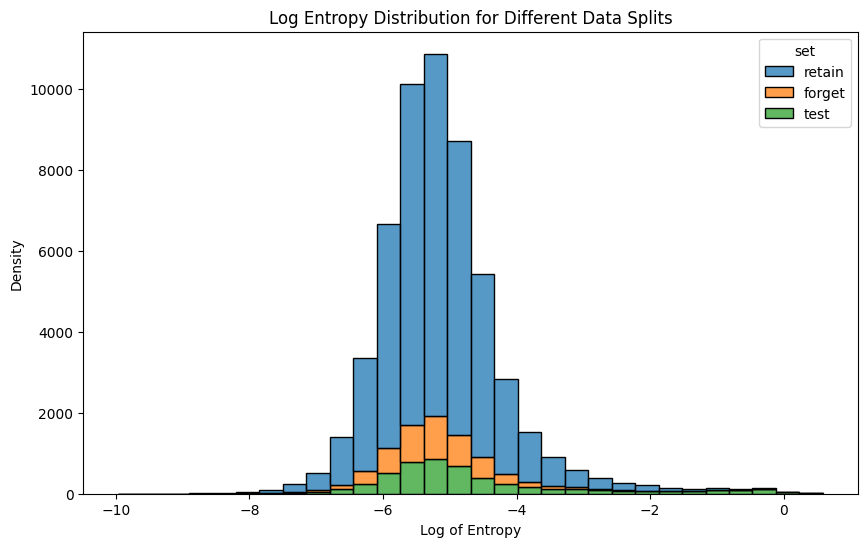

In [21]:
original = torch.load('streisand_models/original.pth')
original_retain = collect_prob(dl["retain"], original)
original_forget = collect_prob(dl["forget"], original)
original_test = collect_prob(dl["test"], original)

original_retain = entropy(original_retain)
original_forget = entropy(original_forget)
original_test = entropy(original_test)

# apply log
# original_retain = torch.log(original_retain).to('cpu')
# original_forget = torch.log(original_forget).to('cpu')
# original_test = torch.log(original_test).to('cpu')


# Create a DataFrame combining the log entropy values and labels
data_original = pd.DataFrame({
    'log_entropy': np.concatenate([original_retain.to('cpu'), original_forget.to('cpu'), original_test.to('cpu')]),
    'set': ['retain'] * len(original_retain) + ['forget'] * len(original_forget) + ['test'] * len(original_test),
})
# Create the histogram plot with different colors for each data split
plt.figure(figsize=(10, 6))
sns.histplot(data=data_original, x='log_entropy', hue='set', multiple='stack', kde=False, bins=30)
plt.title('Log Entropy Distribution for Different Data Splits')
plt.xlabel('Log of Entropy')
plt.ylabel('Density')

plt.show()

Text(0, 0.5, 'Density')

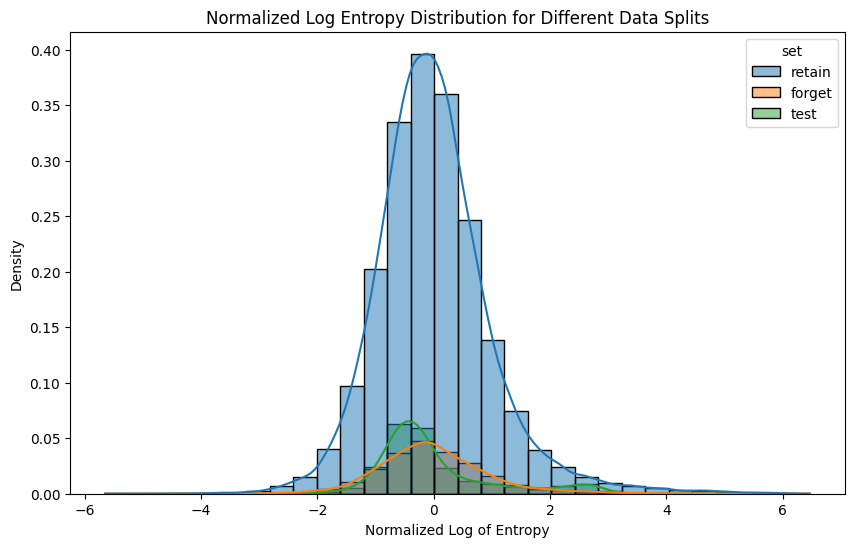

In [38]:
# Create the histogram plot with different colors for each data split
plt.figure(figsize=(10, 6))
sns.histplot(data=data_original, x='log_entropy', hue='set', multiple='layer', kde=True, bins=30, stat='density')
plt.title('Normalized Log Entropy Distribution for Different Data Splits')
plt.xlabel('Normalized Log of Entropy')
plt.ylabel('Density')

In [29]:
gold = torch.load('streisand_models/gold.pth')
gold_retain = collect_prob(dl["retain"], gold)
gold_forget = collect_prob(dl["forget"], gold)
gold_test = collect_prob(dl["test"], gold)

gold_retain = entropy(gold_retain)
gold_forget = entropy(gold_forget)
gold_test = entropy(gold_test)

# apply log
gold_retain = torch.log(gold_retain).to('cpu')
gold_forget = torch.log(gold_forget).to('cpu')
gold_test = torch.log(gold_test).to('cpu')

# Create a DataFrame combining the log entropy values and labels
data_gold = pd.DataFrame({
    'log_entropy': np.concatenate([gold_retain.to('cpu'), gold_forget.to('cpu'), gold_test.to('cpu')]),
    'set': ['retain'] * len(gold_retain) + ['forget'] * len(gold_forget) + ['test'] * len(gold_test),
})

# Normalize each set separately
data_gold['log_entropy'] = data_gold.groupby('set')['log_entropy'].transform(lambda x: (x - x.mean()) / x.std())

# Create the histogram plot with different colors for each data split
plt.figure(figsize=(10, 6))
sns.histplot(data=data_gold, x='log_entropy', hue='set', multiple='stack', kde=False, bins=30, stat='density')
plt.title('Normalized Log Entropy Distribution for Different Data Splits')
plt.xlabel('Normalized Log of Entropy')
plt.ylabel('Density')

plt.show()


  0%|          | 0/45000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Normalize each set separately
data_gold['log_entropy'] = data_gold.groupby('set')['log_entropy'].transform(lambda x: (x - x.mean()) / x.std())

# Create the histogram plot with different colors for each data split
plt.figure(figsize=(10, 6))
sns.histplot(data=data_gold, x='log_entropy', hue='set', multiple='stack', kde=False, bins=30, stat='density')
plt.title('Normalized Log Entropy Distribution for Different Data Splits')
plt.xlabel('Normalized Log of Entropy')
plt.ylabel('Density')

plt.show()

  0%|          | 0/45000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

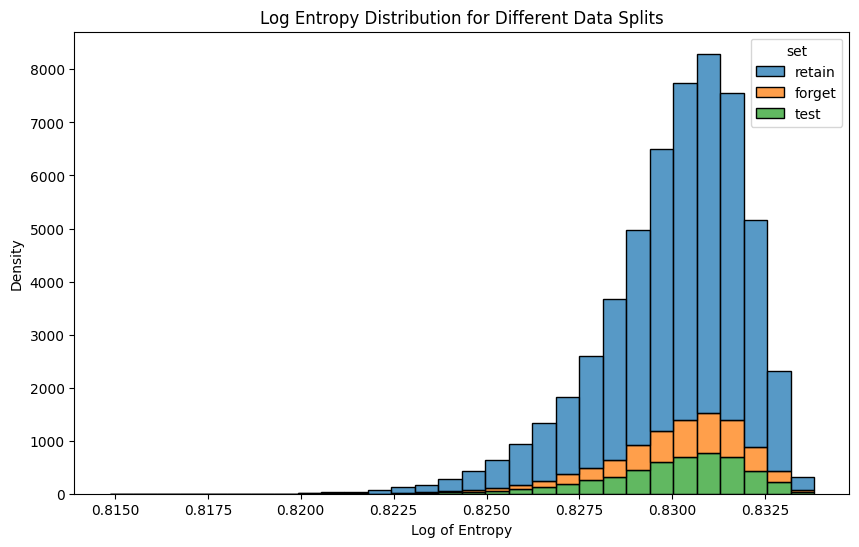

In [24]:
relabel = torch.load('streisand_models/relabel.pth')
relabel_retain = collect_prob(dl["retain"], relabel)
relabel_forget = collect_prob(dl["forget"], relabel)
relabel_test = collect_prob(dl["test"], relabel)

relabel_retain = entropy(relabel_retain)
relabel_forget = entropy(relabel_forget)
relabel_test = entropy(relabel_test)

# apply log
# relabel_retain = torch.log(relabel_retain).to('cpu')
# relabel_forget = torch.log(relabel_forget).to('cpu')
# relabel_test = torch.log(relabel_test).to('cpu')

# Create a DataFrame combining the log entropy values and labels
data_relabel = pd.DataFrame({
    'log_entropy': np.concatenate([relabel_retain.to('cpu'), relabel_forget.to('cpu'), relabel_test.to('cpu')]),
    'set': ['retain'] * len(relabel_retain) + ['forget'] * len(relabel_forget) + ['test'] * len(relabel_test),
})

# Create the histogram plot with different colors for each data split
plt.figure(figsize=(10, 6))
sns.histplot(data=data_relabel, x='log_entropy', hue='set', multiple='stack', kde=False, bins=30, stat='density')
plt.title('Log Entropy Distribution for Different Data Splits')
plt.xlabel('Log of Entropy')
plt.ylabel('Density')

plt.show()


  0%|          | 0/45000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

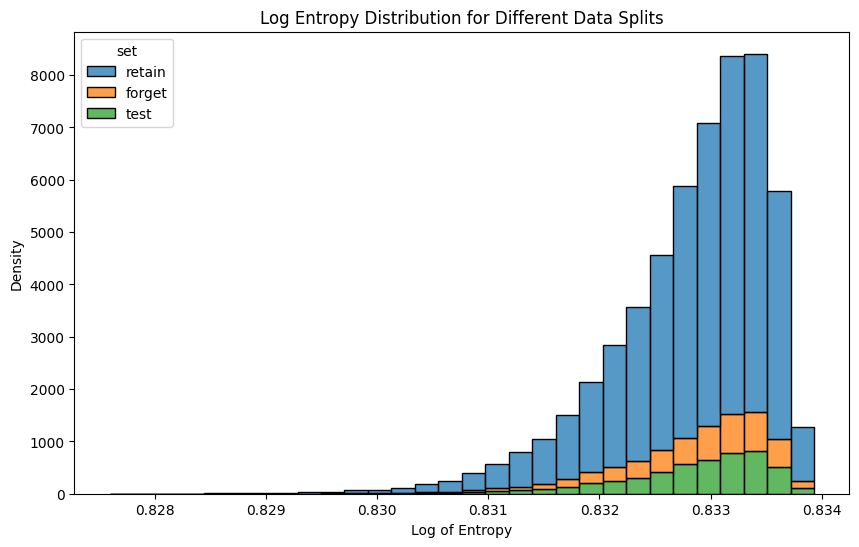

In [25]:
our = torch.load('streisand_models/our.pth')
our_retain = collect_prob(dl["retain"], our)
our_forget = collect_prob(dl["forget"], our)
our_test = collect_prob(dl["test"], our)

our_retain = entropy(our_retain)
our_forget = entropy(our_forget)
our_test = entropy(our_test)

# apply log
our_retain = torch.log(our_retain).to('cpu')
our_forget = torch.log(our_forget).to('cpu')
our_test = torch.log(our_test).to('cpu')

# Create a DataFrame combining the log entropy values and labels
data_our = pd.DataFrame({
    'log_entropy': np.concatenate([our_retain.to('cpu'), our_forget.to('cpu'), our_test.to('cpu')]),
    'set': ['retain'] * len(our_retain) + ['forget'] * len(our_forget) + ['test'] * len(our_test),
})

# Create the histogram plot with different colors for each data split
plt.figure(figsize=(10, 6))
sns.histplot(data=data_our, x='log_entropy', hue='set', multiple='stack', kde=False, bins=30, stat='density')
plt.title('Log Entropy Distribution for Different Data Splits')
plt.xlabel('Log of Entropy')
plt.ylabel('Density')

plt.show()

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Function to create and normalize KDE for each dataset
def plot_normalized_kde(data, label, color):
    kde = stats.gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 1000)
    y = kde(x_range)
    y_normalized = y / y.max()  # Normalize to max height of 1
    plt.plot(x_range, y_normalized, label=label, color=color)

# Create a plot for each set
for set_name in ['retain', 'forget', 'test']:
    plt.figure(figsize=(12, 6))
    
    # Plot for each model
    plot_normalized_kde(data_original[data_original['set'] == set_name]['entropy'], 'Original', 'blue')
    plot_normalized_kde(data_gold[data_gold['set'] == set_name]['entropy'], 'Gold', 'gold')
    plot_normalized_kde(data_relabel[data_relabel['set'] == set_name]['entropy'], 'Relabel', 'green')
    plot_normalized_kde(data_our[data_our['set'] == set_name]['entropy'], 'Our', 'red')

    plt.title(f'Normalized Log Entropy Distribution for {set_name.capitalize()} Set')
    plt.xlabel('Log of Entropy')
    plt.ylabel('Normalized Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

KeyError: 'entropy'

<Figure size 1200x600 with 0 Axes>